# Задание

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0] 

## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

In [19]:
# Код тут
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0] 
data.drop(0, inplace=True)
data.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


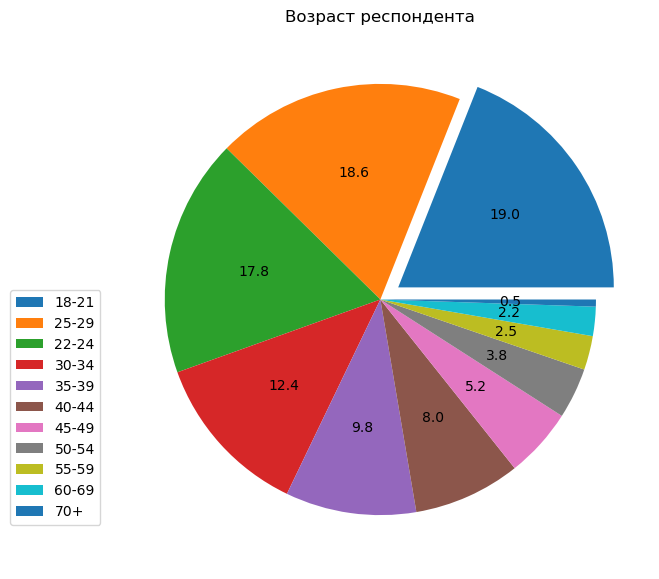

In [21]:
plt.figure(figsize=(8,7))
age = data['Q2'].value_counts()
exp =[i*0 for i in age.values]
exp[0]=0.1
plt.pie(age, autopct='%1.1f', explode=exp)
plt.title('Возраст респондента')
plt.legend(age.index, loc= 'center left', bbox_to_anchor = (-0.2, 0.3))


## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации. \
Отсортируй библиотеки по уменьшению популярности. Используй цветовую палитру 'colorblind'.

Text(0, 0.5, 'Библиотека')

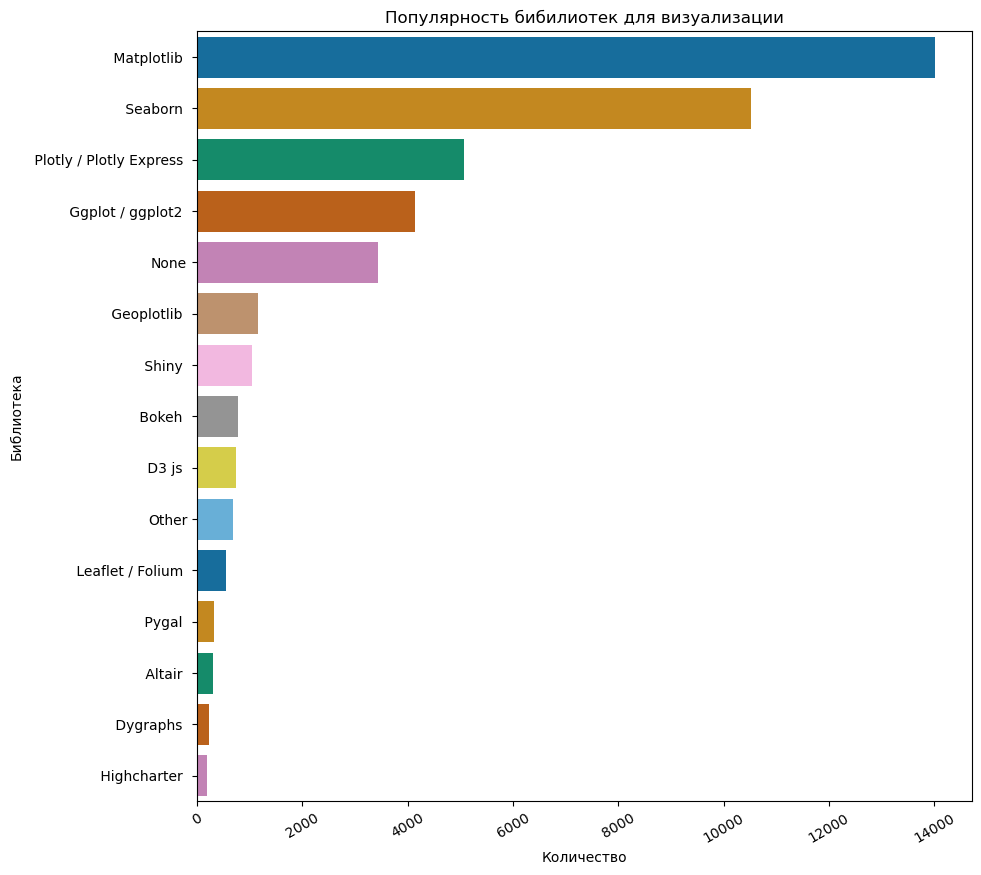

In [23]:
# Код тут
 
q15_columns = [col for col in data.columns if col.startswith('Q15')]
library = data[q15_columns].melt(var_name='question', value_vars=q15_columns)
lib = library['value'].value_counts()
#lib = lib.drop(index='None')
plt.figure(figsize=(10,10))
sns.barplot(x=lib.values, y=lib.index, palette='colorblind')
plt.title('Популярность бибилиотек для визуализации')
plt.xticks(rotation=30)
plt.xlabel('Количество')
plt.ylabel('Библиотека')



## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям. \
Отсортируй специальности по убыванию медианы заработка. Используй цветовую палитру 'colorblind'

Text(0, 0.5, 'Специальности')

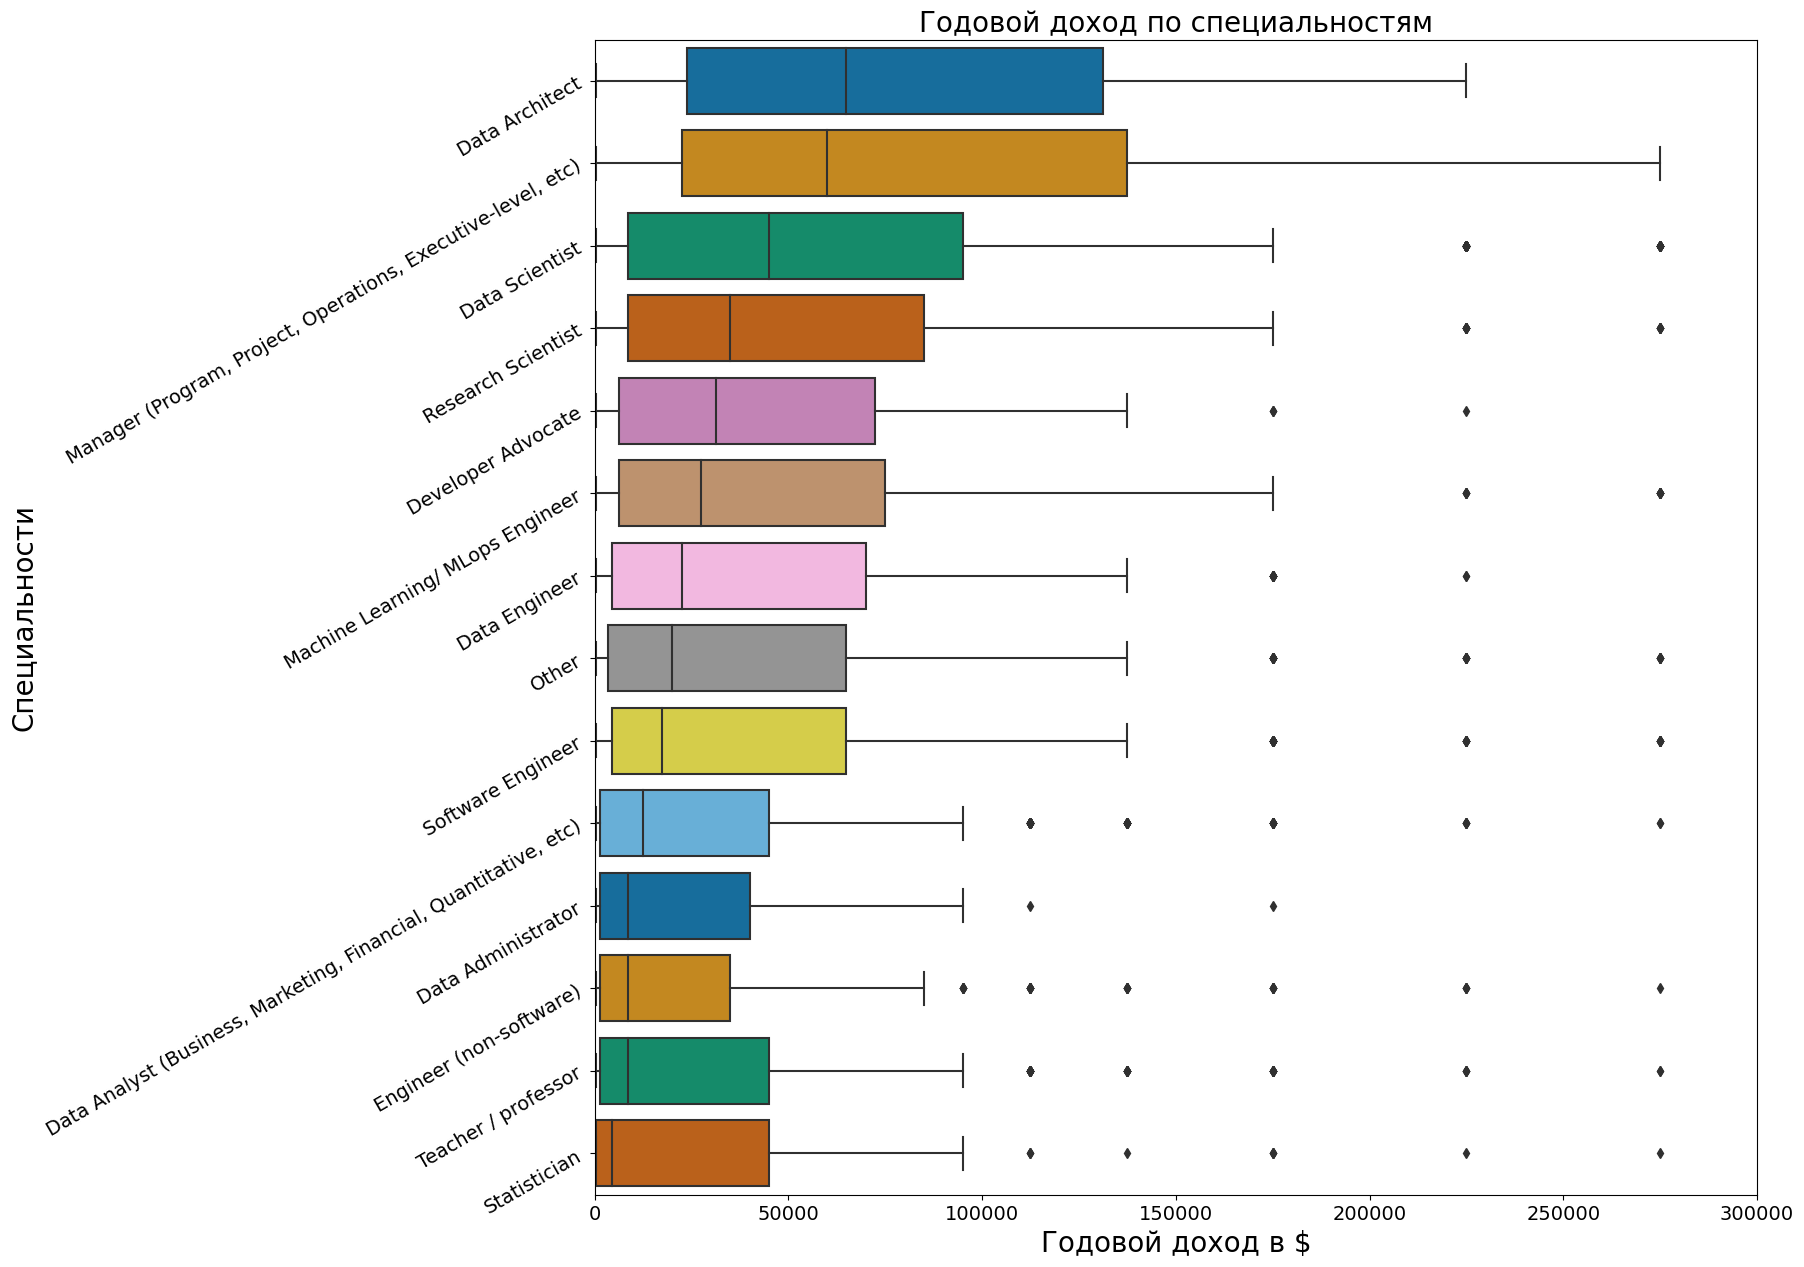

In [24]:
# Код тут
ZP_spec=data[['Q23','Q29']]
ZP_spec=ZP_spec.dropna()
ZP_spec['Q29']=ZP_spec['Q29'].apply(lambda x: "".join(i for i in x if (i.isdecimal())|(i=='-')))
ZP_spec['Q29']=ZP_spec['Q29'].apply(lambda x: (min([int(i) for i in x.split('-')])+(max([int(i) for i in x.split('-')])))/2)
ZP_spec['Q29']=ZP_spec['Q29'].round(0)

order_median = ZP_spec.groupby(['Q23']).median().sort_values('Q29', ascending=False).round(0)
order_m=[i for i in order_median.index]

plt.figure(figsize=(15,15))
sns.boxplot(x=ZP_spec['Q29'], y=ZP_spec['Q23'], palette='colorblind',order=order_m)
plt.xlim(0, 300000)
plt.yticks(rotation=30, fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.title('Годовой доход по специальностям', fontsize=20)
plt.xlabel('Годовой доход в $', fontsize=20)
plt.ylabel('Специальности',fontsize=20)


## Задание 4
Используя модуль graph_objects из библиотеки plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect. \
Цвета в этом задании не важны

In [25]:
# Код тут
import plotly as pl
import plotly.graph_objects as go
from plotly.subplots import make_subplots

spec_list = [['Data Administrator', 'Data Analyst', 'Data Engineer'],  
             ['Data Scientist', 'Engineer', 'Machine Learning'], 
             ['Research Scientist', 'Software Engineer', 'Data Architect']]
title_list= ['Data Administrator', 'Data Analyst', 'Data Engineer',  
             'Data Scientist', 'Engineer', 'MLops Engineer', 
             'Research Scientist', 'Software Engineer', 'Data Architect']
data4 = data[data['Q23'].notna()] \
            .sort_values('Q23')[['Q2', 'Q23', 'Q4']] \
            .groupby(['Q23', 'Q2'], as_index=False) \
            .agg('count').rename(columns={'Q4': 'counter'})



In [26]:
fig2 = make_subplots(rows=len(spec_list), cols=len(spec_list[0]),
                     subplot_titles = ['<b><i>'+_+'</i></b>' for _ in title_list])
for i in range(len(spec_list)):
    for j in range(len(spec_list[0])):
        data5 = data4[data4.Q23.str.startswith(spec_list[i][j], na=False)]
        fig2.add_trace(go.Bar(x=data5.Q2, y=data5.counter, name=spec_list[i][j]), 
                       row=i+1, col=j+1)
fig2.update_layout(title='<i>Распределение возрастов по специальностям</i>',
                   height=800)
fig2.show()

## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом вам поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/). \
В аргументах функции укажи параметр color_continuous_scale="Viridis".

In [27]:

import plotly.express as px

data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0] 

cantry = data['Q4'].drop(0) 
cantry_counts = cantry.value_counts().reset_index() 
cantry_counts.columns = ['country', 'Количество респондентов'] 

fig = px.choropleth(data_frame = cantry_counts,
                    locations = 'country',
                    locationmode ='country names',
                    color ='Количество респондентов',
                    color_continuous_scale ='Viridis',
                    range_color = (0, 1000))
                   
fig.update_layout(title = {'text': "Карта Мира",'x': 0.5, 'y': 0.95},
                    geo = dict(showframe = True, showcoastlines = True),
                    coloraxis_colorbar=dict(len = 2.1, x = 0.9, ticks = 'outside'))
fig.show()

## Задание 6 - Дополнительное

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/). 
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками. \
Загрузи итоговую визуализацию на гит в формате .gif.

In [9]:
# Код тут